In [121]:
# Initial imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [259]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv("../Web Scraping/predicting_house_price.csv")
df = df.drop("Unnamed: 0", axis =1)

# Review the DataFrame
df.head()

,lat,lon,city,style,building_type,cooling_type,heating_type,price,number_of_beds,number_of_baths,extra_space,fire_place
0,43.333410,-79.882930,Waterdown,Townhouse,Row / Townhouse,Central air conditioning,Forced air,749900.0,2,3,0,0
1,43.856371,-79.337682,Markham,Detached,House,Central air conditioning,Forced air,2998000.0,5,8,1,1
2,43.670890,-79.316931,Toronto,Detached,House,Central air conditioning,Forced air,2599900.0,3,4,0,1
3,43.589623,-79.644388,Mississauga,Semi-Detached,House,Central air conditioning,Forced air,2499850.0,4,4,1,0
4,43.447436,-79.666672,Oakville,Detached,House,Central air conditioning,Forced air,1999000.0,5,4,0,1


In [260]:
# Look at correlation matrix
print(df.corr())

                      lat       lon     price  number_of_beds  \
lat              1.000000  0.834972 -0.048344        0.007451   
lon              0.834972  1.000000 -0.023408       -0.058920   
price           -0.048344 -0.023408  1.000000        0.486948   
number_of_beds   0.007451 -0.058920  0.486948        1.000000   
number_of_baths -0.021757 -0.025729  0.611288        0.532419   
extra_space     -0.078297 -0.070226  0.235690       -0.039140   
fire_place       0.202641  0.192969  0.418459        0.262287   

                 number_of_baths  extra_space  fire_place  
lat                    -0.021757    -0.078297    0.202641  
lon                    -0.025729    -0.070226    0.192969  
price                   0.611288     0.235690    0.418459  
number_of_beds          0.532419    -0.039140    0.262287  
number_of_baths         1.000000     0.193510    0.369626  
extra_space             0.193510     1.000000    0.090484  
fire_place              0.369626     0.090484    1.000000  

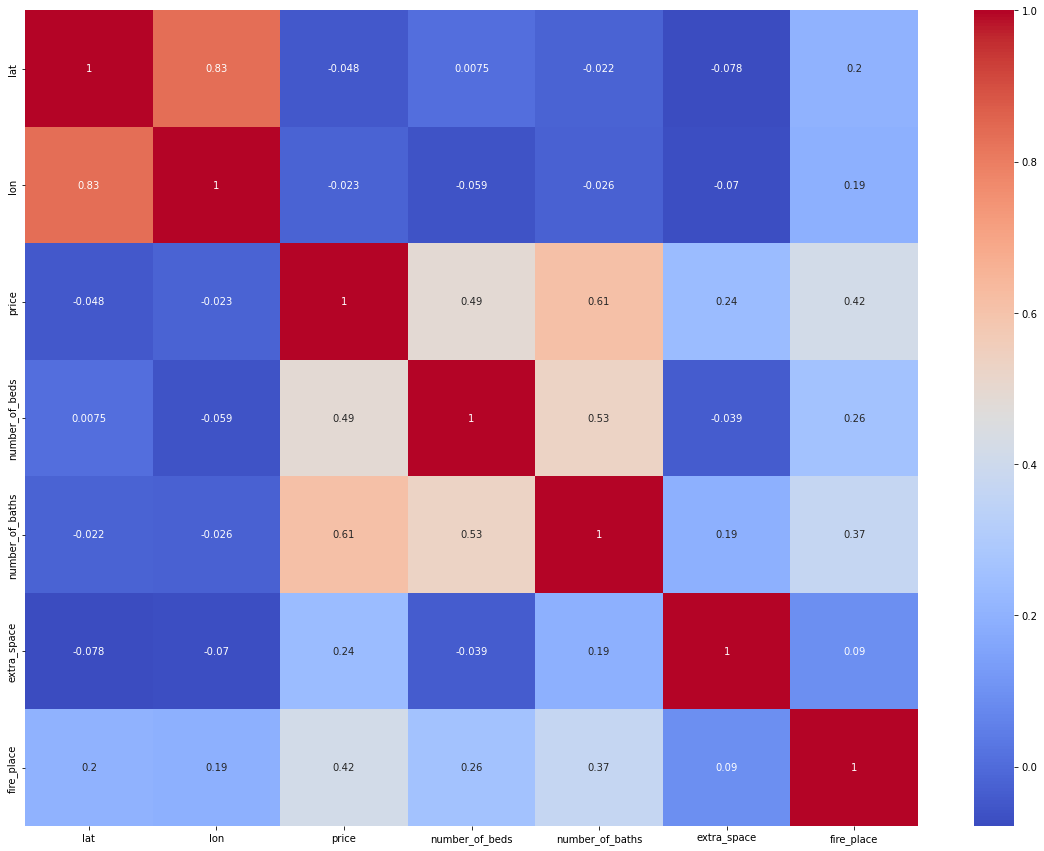

In [261]:
# Plot matrix
plt.figure(figsize=(20, 15))
correlations = df.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [262]:
# Turn categorical columns to 1's/0's
df_encoded = pd.get_dummies(df, columns=['city', 'style', 'building_type', 'cooling_type', 'heating_type'])
df = df_encoded.drop(columns=["lat", "lon"])

df.head()

,price,number_of_beds,number_of_baths,extra_space,fire_place,city_Ajax,city_Alban,city_Alexandria,city_Alnwick/Haldimand,city_Amherstburg,...,"heating_type_Baseboard heaters, Other",heating_type_Boiler,heating_type_Forced air,"heating_type_Forced air, Heat Pump","heating_type_Forced air, Wood Stove",heating_type_Heat Pump,heating_type_Hot water radiator heat,"heating_type_Hot water radiator heat, Radiant heat",heating_type_Radiant heat,"heating_type_Radiant heat, Boiler"
0,749900.0,2,3,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2998000.0,5,8,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2599900.0,3,4,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2499850.0,4,4,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1999000.0,5,4,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# Preprocessing Data

In [263]:
# Create features set 
X = df.copy()
X.drop(["price"], axis=1, inplace=True)
X.head()

,number_of_beds,number_of_baths,extra_space,fire_place,city_Ajax,city_Alban,city_Alexandria,city_Alnwick/Haldimand,city_Amherstburg,city_Ancaster,...,"heating_type_Baseboard heaters, Other",heating_type_Boiler,heating_type_Forced air,"heating_type_Forced air, Heat Pump","heating_type_Forced air, Wood Stove",heating_type_Heat Pump,heating_type_Hot water radiator heat,"heating_type_Hot water radiator heat, Radiant heat",heating_type_Radiant heat,"heating_type_Radiant heat, Boiler"
0,2,3,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5,8,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,4,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,4,4,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5,4,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [264]:
# Create target set
y = df["price"]

In [272]:
from sklearn.tree import DecisionTreeRegressor

# Splitting into testing/training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Used for scaling
scaler = StandardScaler()

# Fit scaled data
X_scaler = scaler.fit(X_train)

# Scaling data for testing/training
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create decision tree regression instance
model = DecisionTreeRegressor()

# Fit model
model = model.fit(X_train_scaled, y_train)

# Making predictions using scaled data
predictions = model.predict(X_test_scaled)

model.score(X_test_scaled, predictions)

1.0

In [273]:
# Shows which features effect the price of the house the most
# Get the feature importance array
importances = model.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.46543712657722197, 'number_of_baths'),
 (0.08531112447779482, 'city_Toronto'),
 (0.07782061649786215, 'number_of_beds'),
 (0.04492207466911356, 'style_Detached'),
 (0.03839801071591822, 'fire_place'),
 (0.03136645360714329, 'extra_space'),
 (0.027663696146300452, 'city_Burlington'),
 (0.017481768677076896, 'city_Mississauga'),
 (0.015211466140854692, 'city_Vaughan'),
 (0.015094296022662214, 'city_Ottawa')]

<AxesSubplot:xlabel='number_of_baths', ylabel='price'>

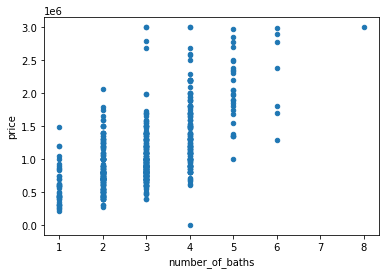

In [274]:
df[['price', 'number_of_baths']].plot.scatter(x='number_of_baths', y='price')

<AxesSubplot:xlabel='number_of_beds', ylabel='price'>

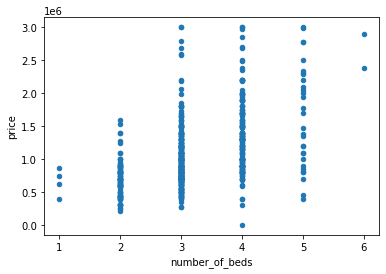

In [275]:
df[['price', 'number_of_beds']].plot.scatter(x='number_of_beds', y='price')

In [276]:
import pingouin as pg
pg.corr(x=df['number_of_baths'], y=df['price'])

,n,r,CI95%,p-val,BF10,power
pearson,609,0.611288,"[0.56, 0.66]",1.126609e-63,1.495e+60,1.0


In [164]:
!pip install pingouin

  Using cached pingouin-0.5.3-py3-none-any.whl (198 kB)
  Using cached pandas_flavor-0.5.0-py3-none-any.whl (7.1 kB)
  Using cached outdated-0.2.2-py2.py3-none-any.whl (7.5 kB)
  Using cached lazy_loader-0.2-py3-none-any.whl (8.6 kB)
  Using cached littleutils-0.2.2.tar.gz (6.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=156a0e7ab7bb5eb6bde3e24aa7caf87ba0211a9241138de9904ba83afb8dbf8c
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\04\bb\0d\2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils
